In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linear-regression/LinearX.npy
/kaggle/input/linear-regression/LinearY.npy


In [2]:
import math
import matplotlib.pyplot as plt

In [3]:
X=np.load("/kaggle/input/linear-regression/LinearX.npy")
Y=np.load("/kaggle/input/linear-regression/LinearY.npy")

In [4]:

np.size(X)
np.size(Y)

100

In [5]:
n_train = math.floor(0.75 * X.shape[0])
n_test = math.ceil((0.25) * X.shape[0])
X_train = X[:n_train]
y_train = Y[:n_train]
X_test = X[n_train:]
y_test = Y[n_train:]

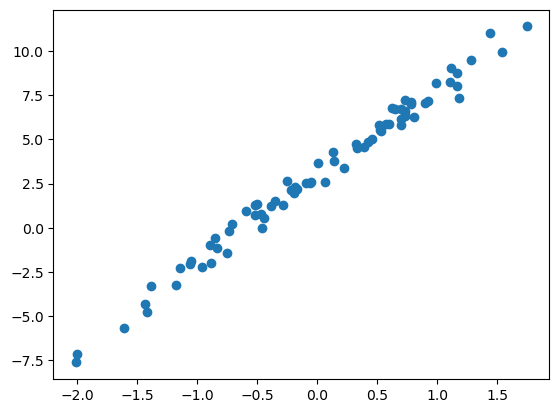

In [6]:
plt.scatter(X_train,y_train)
plt.show()

In [7]:
def y_hat(theta, x):
    return theta[0] +theta[1]*x

def error(X, Y, theta):
    Y_ = y_hat(theta,X) # predicted values of y
    e = np.sum((Y_-Y)**2) # Mean Square Error
    m = X.shape[0]
    return e/m  


def getGrad(X, Y, theta):
    grad = np.zeros((2,))
    Y_ = y_hat(theta,X) # Predicted values of Y beased on current theta1 and theta2
    
    grad[0] = 2*np.sum(Y_ - Y)
    grad[1] = 2*np.sum((Y_ - Y)*X)
    
    m = X.shape[0]
    
    return grad/m  


def gradDescent(X,Y, lr=0.01):
    theta = np.zeros((2,)) # [0,0]
    
    error_list = []
    for i in range(600):
        grad = getGrad(X,Y,theta) # dy/dx
        theta = theta - lr*grad
        e = error(X,Y,theta) # Y = theta1*x + theta2 
        error_list.append(e)
        
    return theta, error_list

In [8]:
theta, error_list = gradDescent(X_train,y_train)

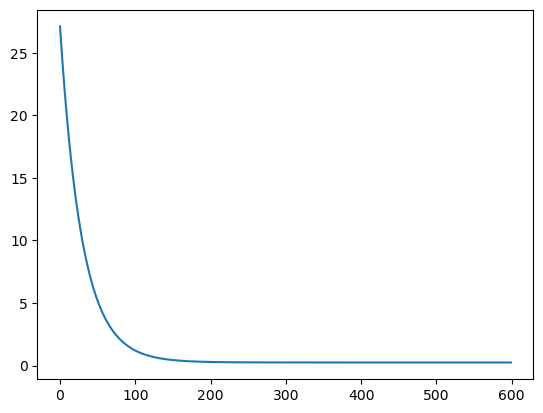

In [9]:
plt.plot(error_list)

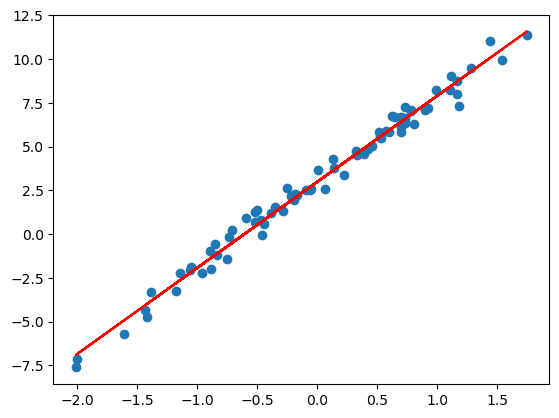

In [10]:
plt.scatter(X_train,y_train)
Y_ = y_hat(theta, X_train)
plt.plot(X_train,Y_,color='red')
plt.show()

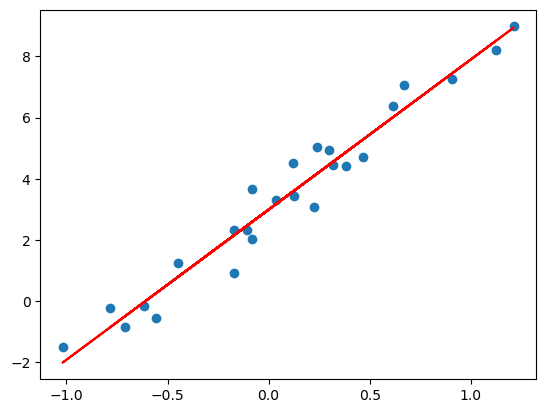

In [11]:
plt.scatter(X_test,y_test)
Y_ = y_hat(theta, X_test)
plt.plot(X_test,Y_,color='red')
plt.show()

<BarContainer object of 25 artists>

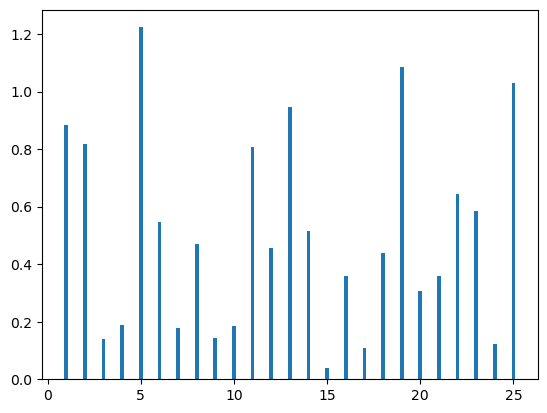

In [12]:
diff=abs(Y_-y_test)
x=range(1,26);
plt.bar(x,diff,width=0.2)